# CSCI 390: Machine Learning

File name: Turauth_HW4.ipynb

The purpose of this file is to explore the workings of CNN models.

## Part 1

In [ ]:
# Mount Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Much of the code in this cell is taken from teacher.

#Simple CNN to classify MNIST dataset.
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from tabulate import tabulate

# Import dataset.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Reshape and normalize the data.
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Prepare a table.
headers = ['Layer Count', 'Kernel Count (Conv2D Layers)', 'Kernel Size (Conv2D Layers)', 'Stride', 'Accuracy', 'Total Params']
data = []

# Use for statements to train and test models with different configurations.
for layers in [4, 5]:
  for kernels in [32, 64]:
    for kernel_sizes in [3, 4]:
      for strides in [1, 2]:
        # Design model architecture.
        CNN = keras.models.Sequential()
        CNN.add(Input(shape=x_train[0].shape))
        if layers == 5:
          CNN.add(Conv2D(kernels, kernel_sizes, strides=strides, padding="same", activation="relu"))
        CNN.add(MaxPool2D(pool_size=(2, 2)))
        CNN.add(Conv2D(kernels, kernel_sizes, strides=strides, padding="same", activation="relu"))
        CNN.add(MaxPool2D(pool_size=(2, 2)))
        CNN.add(Flatten())
        CNN.add(Dense(64, activation='relu'))
        CNN.add(Dense(10, activation='softmax'))

        # Compile model.
        CNN.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        # Train and evaluate.
        CNN.fit(x_train, y_train, epochs=5, batch_size=32)
        loss, acc = CNN.evaluate(x_test, y_test)
        data.append([layers, kernels, kernel_sizes, strides, round(loss, 4), round(acc, 4), CNN.count_params()])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8674 - loss: 0.4623
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.9682 - loss: 0.1011
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9771 - loss: 0.0734
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9813 - loss: 0.0583
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9837 - loss: 0.0482
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9762 - loss: 0.0746
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7796 - loss: 0.7567
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9414 - loss: 0.1852
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9538 - loss: 0.1455
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9597 - loss: 0.1269
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9641 - loss: 0.1149
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accur

Some verbose output is omitted above.

In [ ]:
print(tabulate(sorted(data, key=lambda x:x[-2]), headers=headers))

  Layer Count    Kernel Count (Conv2D Layers)    Kernel Size (Conv2D Layers)    Stride    Loss    Accuracy    Total Params
-------------  ------------------------------  -----------------------------  --------  ------  ----------  --------------
            4                              32                              3         2  0.1102      0.9645           19466
            4                              64                              3         2  0.1005      0.9689           38218
            4                              32                              4         2  0.0817      0.9731           19690
            4                              64                              4         2  0.0835      0.9732           38666
            4                              32                              3         1  0.0679      0.9776          101386
            4                              64                              4         1  0.0679      0.9791          202506
            5   

In the table above, the layer count includes the input layer, the one or two convolutional layers, and the two dense layers.

The best model had 5 layers, 32 kernels, a kernel size of 4, and stride of 1.

The smallest model with acceptable performance (>99% test accuracy) had 5 layers, 32 kernels, a kernel size of 3, and stride of 1.

# Part 2

The instructions indicate that the smallest model from part one should be used in part two. The following code assumes that this refers to the smallest model with acceptable performance (>99% test accuracy).

0 conv2d_34 (None, 28, 28, 32)
2 conv2d_35 (None, 14, 14, 32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


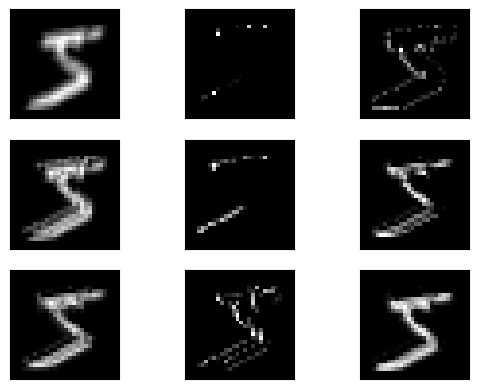

Feature maps of the first nine kernels in the first convolutional layer.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


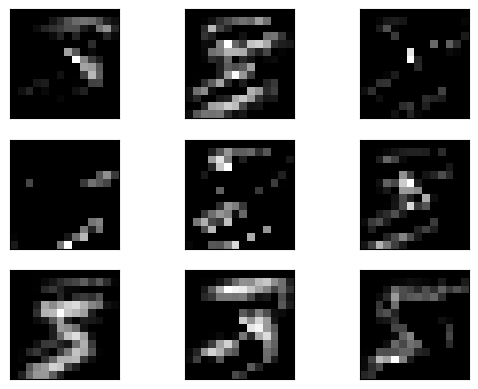

Feature maps of the first nine kernels in the second convolutional layer.



In [ ]:
# Much of the code in this cell is taken from teacher and this tutorial:
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/.

#Simple CNN to classify MNIST dataset.
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from keras.models import Model
from numpy import expand_dims
import matplotlib.pyplot as plt

# Import dataset.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Reshape and normalize the data.
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Design model architecture.
CNN = keras.models.Sequential()
CNN.add(Input(shape=x_train[0].shape))
CNN.add(Conv2D(32, 3, padding="same", activation="relu"))
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Conv2D(32, 3, padding="same", activation="relu"))
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Flatten())
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

# summarize feature map shapes
for i in range(len(CNN.layers)):
	layer = CNN.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

for i, j in zip([0, 2], ['first', 'second']):
  # redefine model to output right after the first hidden layer
  model = Model(inputs=CNN.inputs, outputs=CNN.layers[i].output)

  # Define the input image.
  img = x_train[0]

  # expand dimensions so that it represents a single 'sample'
  img = expand_dims(img, axis=0)

  # get feature map for first hidden layer
  feature_maps = model.predict(img)

  # Plot maps for the first nine kernels in the first convolutional layer in a 3x3 square.
  square = 3
  ix = 1
  for _ in range(square):
    for _ in range(square):
      # specify subplot and turn of axis
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
      ix += 1

  # show the figure
  plt.show()
  print(f'Feature maps of the first nine kernels in the {j} convolutional layer.\n')

The different feature maps for the first convolutional layer generally capture different features.

As expected, the second layer maps are more abstract than those of the first layer.

# Part 3

Among the configurations used in part 1, the model to use as a starting point should feature
*   Accuracy of at least 99%
*   Minimized number of parameters
*   Minimized run time

Looking back at part 2, lower run time corresponds to a lower number of parameters for each of the three configurations that yielded greater than 99% accuracy.

The model with 5 layers, 32 kernels, a kernel size of 3, and a stride of 1 should be used as the starting point for the scenario because it has the lowest run time and the lowest number of parameters among the tested configurations with acceptable performance.